In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from celluloid import Camera

from setup import cleaned_arms_import_path, cleaned_countries_path

# I import pyarrow just to clarify that you need it installed
import pyarrow

In [3]:
if not os.path.isfile(cleaned_arms_import_path) or not os.path.isfile(cleaned_countries_path):
    print('Please first execute ./setup.py after decompressing .zip files')

arms_imports = pd.read_feather(cleaned_arms_import_path).rename(columns={'Country/Region/Group': 'Country'})
countries = pd.read_feather(cleaned_countries_path)

# Sources
* Arms imports data: [Kaggle](https://www.kaggle.com/datasets/justin2028/arms-imports-per-country)
* Countries and regions: [Kaggle](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)


In [4]:
arms_imports[arms_imports['Country'] == 'Afghanistan'].head()

,Country,year,value
0,Afghanistan,1950,0.0
1,Afghanistan,1951,0.0
2,Afghanistan,1952,0.0
3,Afghanistan,1953,0.0
4,Afghanistan,1954,0.0


In [5]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None


In [6]:
arms_imports = arms_imports.merge(countries[['Country', 'Region', 'Population', 'GDP ($ per capita)', 'Literacy (%)', 'Birthrate', 'Deathrate']], on='Country', validate='many_to_one')
arms_imports.head()

,Country,year,value,Region,Population,GDP ($ per capita),Literacy (%),Birthrate,Deathrate
0,Afghanistan,1950,0.0,ASIA (EX. NEAR EAST),31056997,700.0,"36,0","46,6","20,34"
1,Afghanistan,1951,0.0,ASIA (EX. NEAR EAST),31056997,700.0,"36,0","46,6","20,34"
2,Afghanistan,1952,0.0,ASIA (EX. NEAR EAST),31056997,700.0,"36,0","46,6","20,34"
3,Afghanistan,1953,0.0,ASIA (EX. NEAR EAST),31056997,700.0,"36,0","46,6","20,34"
4,Afghanistan,1954,0.0,ASIA (EX. NEAR EAST),31056997,700.0,"36,0","46,6","20,34"


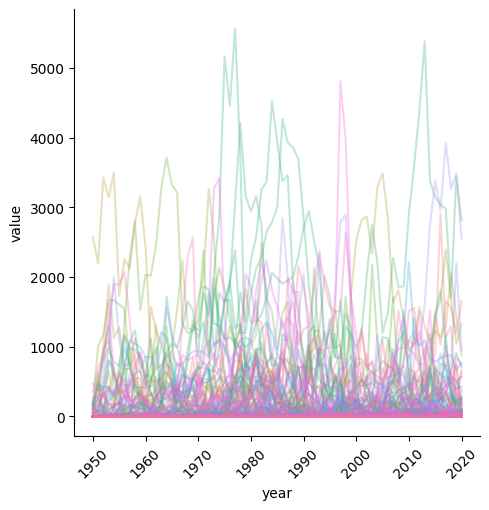

<Figure size 640x480 with 0 Axes>

In [12]:
sns.relplot(x='year', y='value', hue='Country', data=arms_imports[arms_imports['year'] != 'Total'], kind='line', legend=None, alpha=.3)
x_ticks_year_step = 10
year_x_ticks = [year.__str__() for year in np.arange(1950, 2020 + x_ticks_year_step, x_ticks_year_step)]
plt.xticks(ticks=year_x_ticks, rotation=45)
plt.show()
plt.clf()

# Objective
* ## Track and name the countries with the most total arms imports

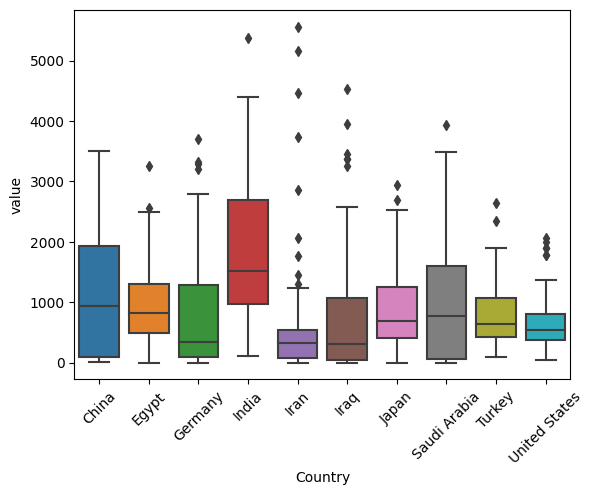

<Figure size 640x480 with 0 Axes>

In [18]:
total_arms_imports = arms_imports[arms_imports['year'] == 'Total']
track_count = 10
highest_total_arms_imports = total_arms_imports.nlargest(track_count, 'value')

countries_with_highest_arms_imports_data = arms_imports[arms_imports['Country'].isin(highest_total_arms_imports['Country'])]

#sns.relplot(x='year', y='value', hue='Country', kind='line', data=countries_with_highest_arms_imports_data[countries_with_highest_arms_imports_data['year'] != 'Total'])
sns.boxplot(x='Country', y='value', data=countries_with_highest_arms_imports_data[countries_with_highest_arms_imports_data['year'] != 'Total'])
plt.xticks(rotation=45)
plt.show()
plt.clf()